<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/12TOxopyRs1xfFg8nb542U9wTehSLouzL#scrollTo=EDJ18EXZ5BUZ)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

# **AutoRAG** – Automates and optimizes RAG systems. 🚀

AutoRAG is an open-source framework designed to streamline the development and optimization of Retrieval-Augmented Generation (RAG) systems. 🌐🔧

RAG systems integrate Large Language Models (LLMs) with external data sources to enhance the generation of contextually relevant responses. 🤖📚

AutoRAG addresses the challenges of selecting and fine-tuning the appropriate modules for specific datasets, thereby improving the performance and efficiency of RAG applications. ⚡

✨ **Key Features:**
- **Automated Module Selection**: Automatically selects and optimizes RAG modules for better performance. 🧠⚙️
- **Scalability**: Handles both small-scale and large-scale RAG deployments. 🌍📊
- **User-Friendly Interface**: Easy to use, with simple configuration and intuitive commands. 👨‍💻👩‍💻

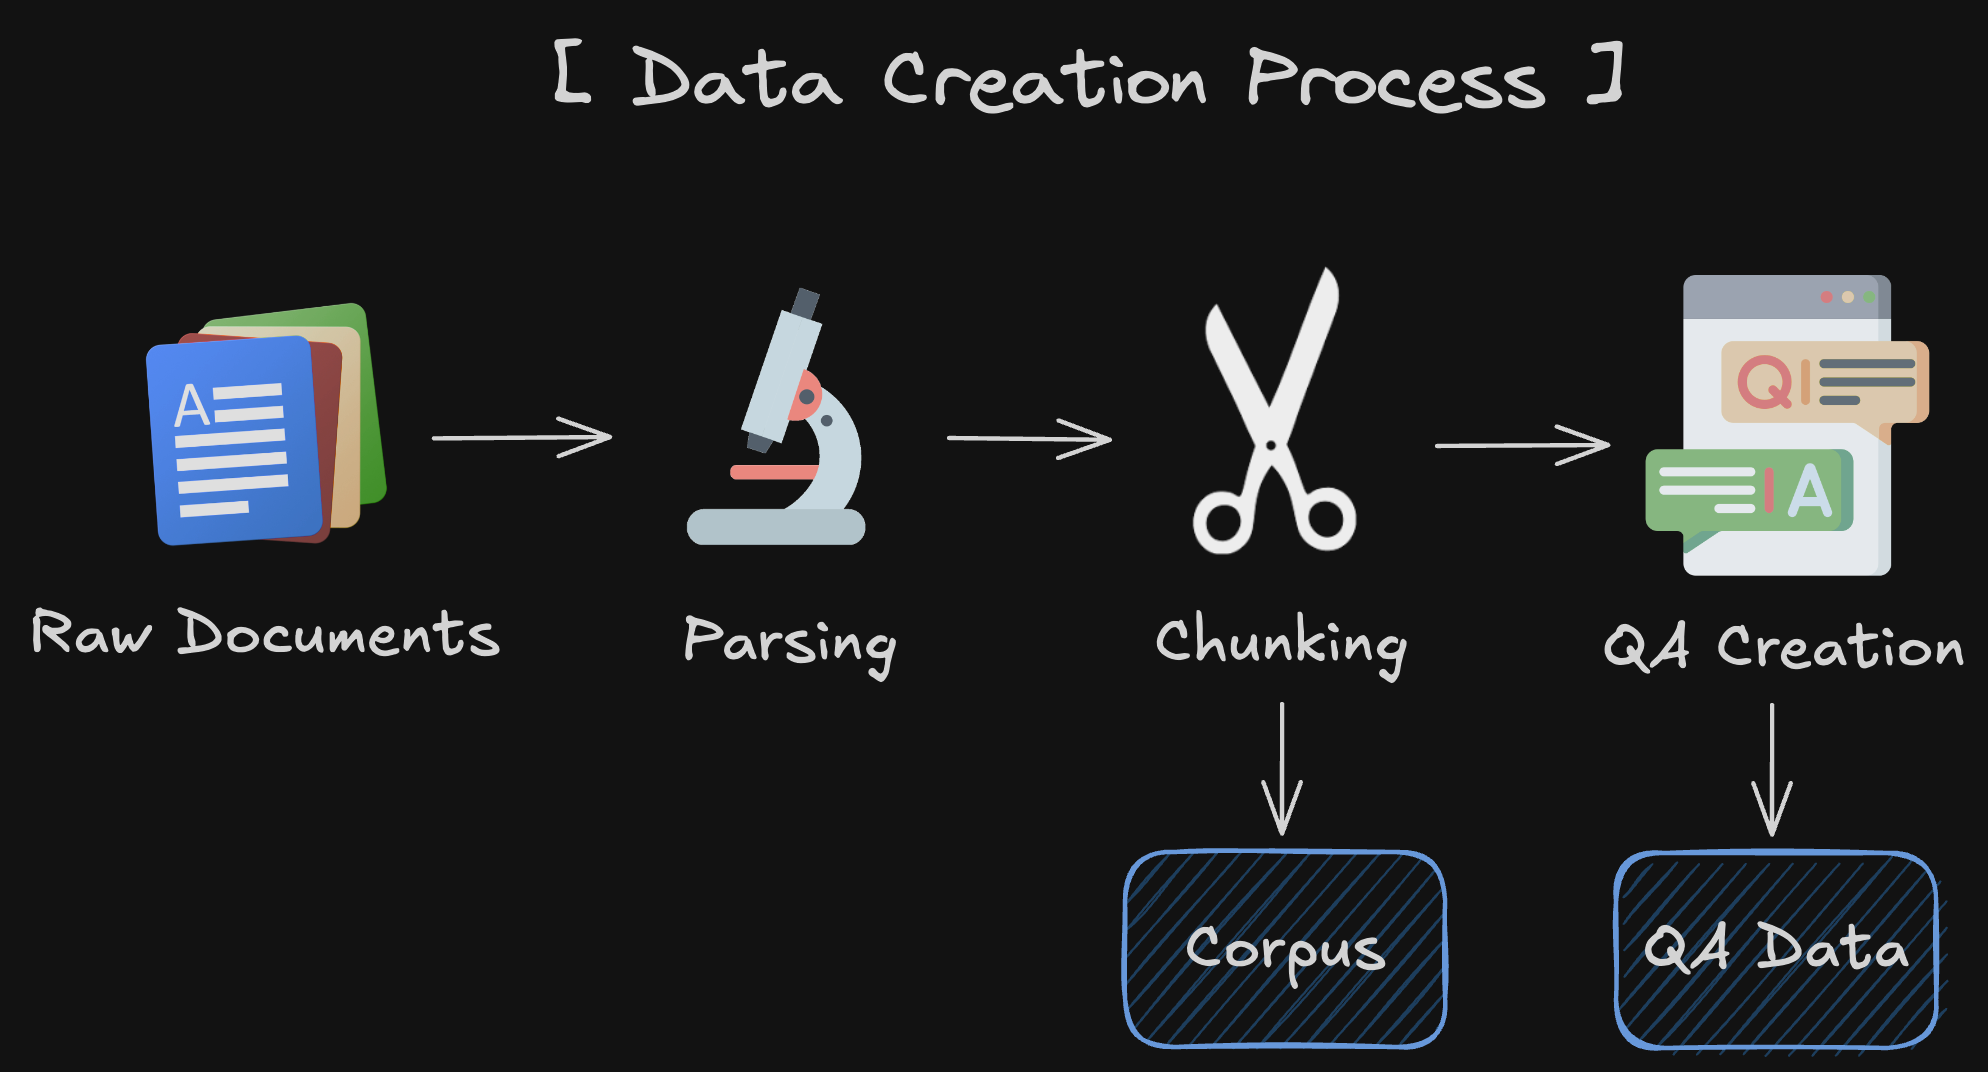

###**Setup and Installation**

In [ ]:
%%shell
apt-get remove python3-blinker
pip install blinker==1.8.2

In [ ]:
%pip install -Uq ipykernel==5.5.6 ipywidgets-bokeh==1.0.2 AutoRAG[parse]>=0.3.0 datasets arxiv pyarrow==15.0.2

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import userdata
import os

openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = openai_api_key

In [ ]:
import nest_asyncio
nest_asyncio.apply()

### **Setting Up Langchain Parse Module for PDF Parsing**


In [ ]:
%%writefile parse.yaml

modules:
  - module_type: langchain_parse
    parse_method: [pdfminer, pypdf]
    file_type: pdf


Overwriting parse.yaml


### **Creating Directory for Raw Documents**


In [ ]:
import os
os.makedirs('/content/raw_documents')

### **Downloading PDFs from arXiv 📚**


In [ ]:

import arxiv

paper = next(arxiv.Client().results(arxiv.Search(id_list=["1605.08386v1", "2409.16176", "2409.16146"])))
paper.download_pdf(dirpath="/content/raw_documents")
paper = next(arxiv.Client().results(arxiv.Search(id_list=["2409.16176"])))
paper.download_pdf(dirpath="/content/raw_documents")
paper = next(arxiv.Client().results(arxiv.Search(id_list=["2409.16146"])))
paper.download_pdf(dirpath="/content/raw_documents")

'/content/raw_documents/2409.16146v2.Controlling_Risk_of_Retrieval_augmented_Generation__A_Counterfactual_Prompting_Framework.pdf'

### **Creating Project Directory 🗂️**








In [ ]:
import os
os.makedirs('/content/parse_project_dir')

### **Start Parsing PDF Documents 📑🔍**








In [ ]:
from autorag.parser import Parser

parser = Parser(data_path_glob="/content/raw_documents/*.pdf", project_dir="/content/parse_project_dir")
parser.start_parsing("/content/parse.yaml")

### **Load Parsed Data Summary 📊**








In [ ]:
import pandas as pd
parse_summary_df = pd.read_csv("/content/parse_project_dir/summary.csv")
parse_summary_df

,filename,module_name,module_params,execution_time
0,pdf.parquet,langchain_parse,"{'parse_method': 'pypdf', 'file_type': 'pdf'}",0.05057
1,pdf.parquet,langchain_parse,"{'parse_method': 'pdfminer', 'file_type': 'pdf'}",0.27881


### **Load PDF Parsing Results 📑**








In [ ]:
pdfminer_raw_df = pd.read_parquet("/content/parse_project_dir/parsed_result.parquet")
pdfminer_raw_df.head()

,texts,path,page,last_modified_datetime
0,Controlling Risk of Retrieval-augmented Genera...,/content/raw_documents/2409.16146v2.Controllin...,1,2025-02-02
1,"ducing unreliable answers, often exhibiting ov...",/content/raw_documents/2409.16146v2.Controllin...,2,2025-02-02
2,which actively determines when to retrieve bas...,/content/raw_documents/2409.16146v2.Controllin...,3,2025-02-02
3,RC-TQ (7785) RC-NQ (3610)\nTQ-A TQ-U NQ-A NQ-U...,/content/raw_documents/2409.16146v2.Controllin...,4,2025-02-02
4,Prompting generation\nAssume that your answer ...,/content/raw_documents/2409.16146v2.Controllin...,5,2025-02-02


### **Chunk Configuration 🧩**

In [ ]:
%%writefile chunk.yaml

modules:
  - module_type: llama_index_chunk
    chunk_method: [ Token, Sentence ]
    chunk_size: [ 1024, 512 ]
    chunk_overlap: 24
    add_file_name: en

Writing chunk.yaml


### **Create Chunk Project Directory 📂**








In [ ]:
import os
os.makedirs("/content/chunk_project_dir")

### **Start Chunking Process 🧩**








In [ ]:
from autorag.chunker import Chunker

chunker = Chunker.from_parquet(parsed_data_path="/content/parse_project_dir/parsed_result.parquet", project_dir="/content/chunk_project_dir")
chunker.start_chunking("/content/chunk.yaml")

### **Investigate Chunked Corpus Summary 📊**








In [ ]:
import pandas as pd
chunk_summary_df = pd.read_csv("/content/chunk_project_dir/summary.csv")
chunk_summary_df

,filename,module_name,module_params,execution_time
0,0.parquet,llama_index_chunk,"{'chunk_method': 'Token', 'chunk_size': 1024, ...",0.009695
1,1.parquet,llama_index_chunk,"{'chunk_method': 'Token', 'chunk_size': 512, '...",0.007919
2,2.parquet,llama_index_chunk,"{'chunk_method': 'Sentence', 'chunk_size': 102...",0.002215
3,3.parquet,llama_index_chunk,"{'chunk_method': 'Sentence', 'chunk_size': 512...",0.002490


### **View Chunked Corpus Data 🔍**

In [ ]:
corpus_df = pd.read_parquet("/content/chunk_project_dir/0.parquet")
corpus_df.head()

,doc_id,contents,path,start_end_idx,metadata
0,64f9db4a-7fdc-4170-b8ad-48d8d84837b1,file_name: 2409.16146v2.Controlling_Risk_of_Re...,/content/raw_documents/2409.16146v2.Controllin...,"[0, 3669]","{'last_modified_datetime': '2025-02-02', 'next..."
1,e2c73e4b-0d2e-4f18-b95e-f23885addda8,file_name: 2409.16146v2.Controlling_Risk_of_Re...,/content/raw_documents/2409.16146v2.Controllin...,"[3622, 4125]","{'last_modified_datetime': '2025-02-02', 'next..."
2,425f6c14-4c26-4f0e-ab41-620ce4f27403,file_name: 2409.16146v2.Controlling_Risk_of_Re...,/content/raw_documents/2409.16146v2.Controllin...,"[0, 4226]","{'last_modified_datetime': '2025-02-02', 'next..."
3,5041b4c2-294e-4cd0-8f88-72ffe3f888b8,file_name: 2409.16146v2.Controlling_Risk_of_Re...,/content/raw_documents/2409.16146v2.Controllin...,"[4165, 5085]","{'last_modified_datetime': '2025-02-02', 'next..."
4,7b0b90a3-4836-4d93-8a62-9c7516b27d6d,file_name: 2409.16146v2.Controlling_Risk_of_Re...,/content/raw_documents/2409.16146v2.Controllin...,"[0, 3897]","{'last_modified_datetime': '2025-02-02', 'next..."


### **Initialize Raw and Corpus Instances 🧑‍💻📊**








In [ ]:
from autorag.data.qa.schema import Raw, Corpus

raw_df = pd.read_parquet("/content/chunk_project_dir/0.parquet")
raw_instance = Raw(raw_df)

corpus_df = pd.read_parquet("/content/chunk_project_dir/0.parquet")
corpus_instance = Corpus(corpus_df, raw_instance)

### **Generate and Filter QA Dataset with OpenAI LLM 🤖💬**








In [ ]:
import pandas as pd
from llama_index.llms.openai import OpenAI

from autorag.data.qa.filter.dontknow import dontknow_filter_rule_based
from autorag.data.qa.generation_gt.llama_index_gen_gt import (
    make_basic_gen_gt,
    make_concise_gen_gt,
)
from autorag.data.qa.query.llama_gen_query import factoid_query_gen
from autorag.data.qa.sample import random_single_hop

llm = OpenAI(model="gpt-4o-mini")

initial_qa = (
    corpus_instance.sample(random_single_hop, n=3) # Only sample three passages. This will make three QA dataset only. Needs to adjust before real use.
    .map(
        lambda df: df.reset_index(drop=True), # Drop index
    )
    .make_retrieval_gt_contents() # This is essential for making questions with gt (ground truth) passages.
    .batch_apply(
        factoid_query_gen,  # query generation
        llm=llm,
    )
    .batch_apply(
        make_basic_gen_gt,  # answer generation (basic)
        llm=llm,
    )
    .batch_apply(
        make_concise_gen_gt,  # answer generation (concise)
        llm=llm,
    )
    .filter(
        dontknow_filter_rule_based,  # unanswerable filter
        lang="en",
    )
)

initial_qa.to_parquet('/content/initial_qa.parquet', '/content/initial_corpus.parquet')

### **View the First Few QA Results 🧐📊**








In [ ]:
# see the QA result
initial_qa.data.head()

,qid,retrieval_gt,retrieval_gt_contents,query,generation_gt
0,a7ff3f4d-2026-4f3d-8b30-a20c94cbca6f,[[2707949f-4866-4b25-8174-554bfd311a5e]],[[file_name: 2409.16146v2.Controlling_Risk_of_...,"Who are the authors of the paper titled ""Selfc...","[The authors of the paper titled ""Selfcheckgpt..."
1,32ec1f2f-68e8-4664-9fef-cafdacecc0e6,[[fccc2c51-0baa-4b02-b6da-515f39846408]],[[file_name: 1605.08386v1.Heat_bath_random_wal...,What is the maximum length of all minimal augm...,[The maximum length of all minimal augmenting ...
2,888041d1-0c47-4010-8d6e-8d0f5a798f48,[[7e157a0b-040b-42ca-b684-e05ae8310b6e]],[[file_name: 1605.08386v1.Heat_bath_random_wal...,"What is the relationship between the path px,y...","[In the context of the set S, the path px,y is..."


### **Access the First Query in the QA Results 🔍**








In [ ]:
initial_qa.data.iloc[0]["query"]

'Who are the authors of the paper titled "Selfcheckgpt: Zero-resource black-box hallucination detection for generative large language models"?'

### **Access the Ground Truth of the First Query in the QA Results 🧠**








In [ ]:
initial_qa.data.iloc[0]["generation_gt"]

['The authors of the paper titled "Selfcheckgpt: Zero-resource black-box hallucination detection for generative large language models" are Potsawee Manakul, Adian Liusie, and Mark Gales.',
 'Potsawee Manakul, Adian Liusie, Mark Gales']

### **Loading New Corpus from Chunked Data 📚**








In [ ]:
new_corpus_df = pd.read_parquet("/content/chunk_project_dir/1.parquet")
new_corpus_instance = Corpus(new_corpus_df, raw_instance)

### **Updating QA with New Corpus 📊**








In [ ]:
new_qa = initial_qa.update_corpus(new_corpus_instance)
new_qa.to_parquet("/content/new_qa.parquet", "/content/new_corpus.parquet")